In [1]:
import os,sys
from brainspace.plotting import plot_hemispheres
from brainstat.datasets import fetch_mask, fetch_template_surface,fetch_parcellation
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import laBIBILaRORO as lbr
from importlib import reload
#reload(laBIBILaRORO)
%matplotlib inline
from scipy.ndimage import gaussian_filter
from IPython.display import Image

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
La bibil à RORO loaded


In [2]:
STUDY_PATH=os.path.join("/NAS","dumbo","protocoles","PSY_bvFTD")

In [3]:
pial_left, pial_right = fetch_template_surface("fsaverage5",layer="pial",join=False)
inflated_left, inflated_right = fetch_template_surface("fsaverage5",layer="inflated",join=False)
pial_combined = fetch_template_surface("fsaverage5", join=True)
mask = fetch_mask("fsaverage5")
glasser = fetch_parcellation("fsaverage5", "glasser", 360)

pial_left_fslr32k, pial_right_fslr32k = fetch_template_surface("fslr32k", join=False)
inflated_left_fslr32k,inflated_right_fslr32k = fetch_template_surface("fslr32k",layer="inflated", join=False)
vinflated_left_fslr32k,vinflated_right_fslr32k = fetch_template_surface("fslr32k",layer="vinflated", join=False)

pial_combined_fslr32k = fetch_template_surface("fslr32k", join=True)
mask_fslr32k = fetch_mask("fslr32k")
glasser_fslr32k = fetch_parcellation("fslr32k", "glasser", 360)

In [ ]:
file_path = '/NAS/tupac/romain/MNI_Glasser_extHCP_etc/HCP-MMP1_UniqueRegionList.csv'
df_exthcp = pd.read_csv(file_path)
#print(df_exthcp.head())  # Affiche les premières lignes du DataFrame

file_path = '/NAS/tupac/romain/MNI_Glasser_extHCP_etc/Glasser_2016_Table-1.xlsx'
df_gla = pd.read_excel(file_path)
#df_gla

#attention entre el numero de regionID et le numero dans numpy ndarray il y aun decalge de 20 l'un recommence à 181 l'autre à 200
#mapping_dict = dict(zip(df_exthcp['regionID'], df_exthcp['Cortex_ID']))
mapping_dict = dict(zip(df_exthcp.index.values+1, df_exthcp['Cortex_ID']))

mapping_dict[0] = 0
def map_values(value):
    return mapping_dict.get(value, 400)  # Remplacer 0 par une autre valeur par défaut si nécessaire

for key in mapping_dict.keys():
    # Vérifier si la clé est supérieure à 180
    if key > 180:
        # Ajouter 22 à la valeur correspondante
        mapping_dict[key] += 22

# Utiliser np.vectorize pour appliquer la fonction de correspondance
vectorized_map = np.vectorize(map_values)
glasser_fslr32k_exthcp = vectorized_map(glasser_fslr32k)

hcpext_dict = df_exthcp.set_index('Cortex_ID')['cortex'].to_dict()
glasser_dict = df_exthcp.set_index('regionID')['regionLongName'].to_dict()

#verif 
#set(mapping_dict.values())

In [ ]:
import nibabel as nib
import numpy as np

# Assuming volOnSurface_W00 is your ndarray
# volOnSurface_W00 = np.random.rand(1000)  # Replace with your actual data

# Create a GIFTI data array
data_array = nib.gifti.GiftiDataArray(data=volOnSurface_W00.astype(np.float32))

# Create a GIFTI image
gifti_image = nib.gifti.GiftiImage(darrays=[data_array])

# Define the output file path
output_file_path = 'volOnSurface_W00.gii'

# Save the GIFTI image to a file
nib.save(gifti_image, output_file_path)

print(f"GIFTI file saved to {output_file_path}")
SURF="/NAS/tupac/renaud/HCP/scripts/Pipelines-3.7.1/global/templates/standard_mesh_atlases/${SIDE}.sphere.32k_fs_LR.surf.gii"
CMD="wb_command -metric-smoothing ${SURF} ${INPUT} ${Sigma} ${OUTPUT}"

# affichage glasser

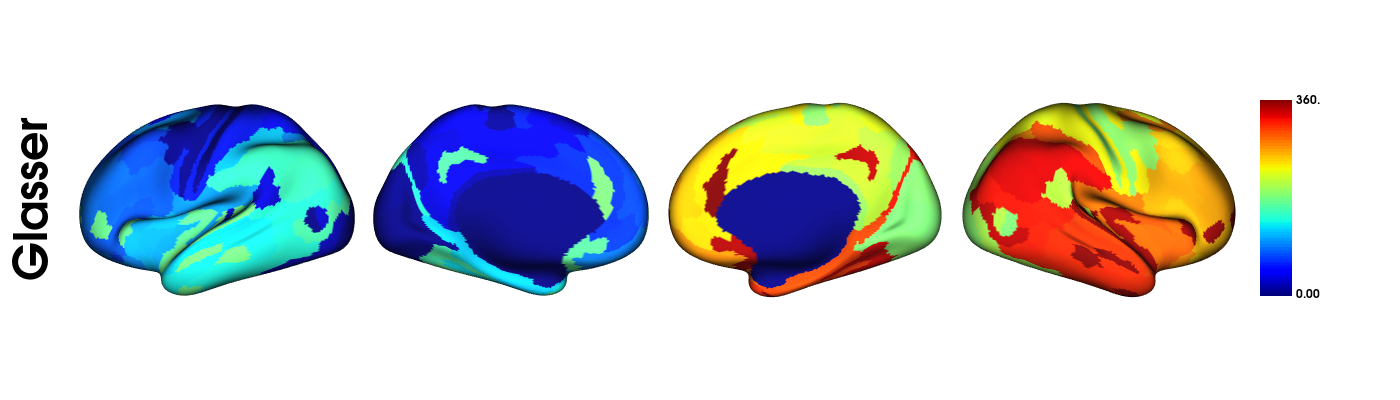

In [6]:
plot_hemispheres(vinflated_left_fslr32k,vinflated_right_fslr32k,glasser_fslr32k, color_bar=True,
        label_text=["Glasser"], cmap="jet", 
        embed_nb=True, size=(1400, 400), zoom=1.2, nan_color=(0.7, 0.7, 0.7, 1), 
        cb__labelTextProperty={"fontSize": 12},transparent_bg=False, interactive=False)

# Affichage HCPex

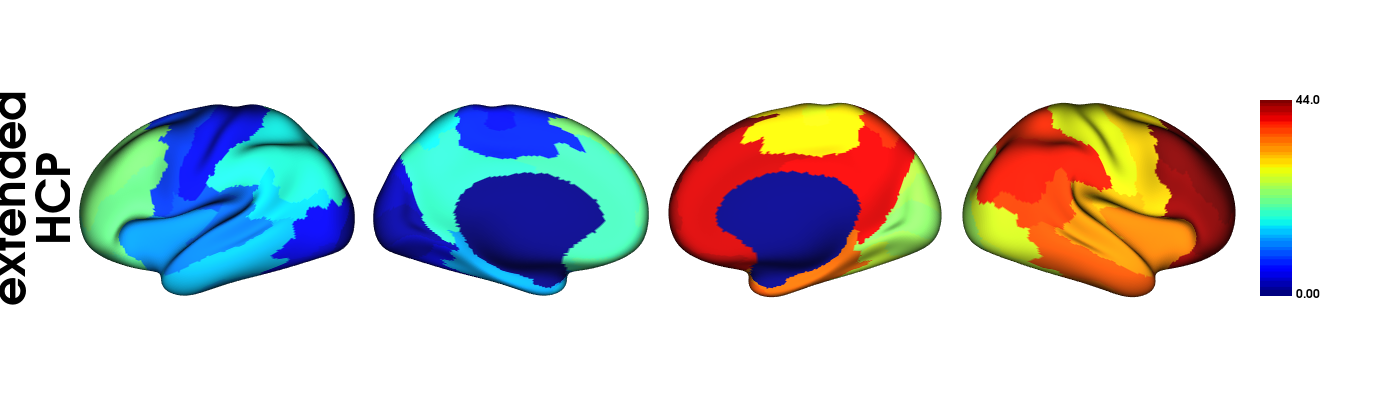

In [7]:
#np.where(np.isin(glasser_fslr32k, [1,2,3,4]),glasser_fslr32k, 0)
plot_hemispheres(vinflated_left_fslr32k,vinflated_right_fslr32k,glasser_fslr32k_exthcp, color_bar=True,
        label_text=["extended\nHCP"], cmap="jet", 
        embed_nb=True, size=(1400, 400), zoom=1.2, nan_color=(0.7, 0.7, 0.7, 1), 
        cb__labelTextProperty={"fontSize": 12},transparent_bg=False, interactive=False)

# Affichage masque

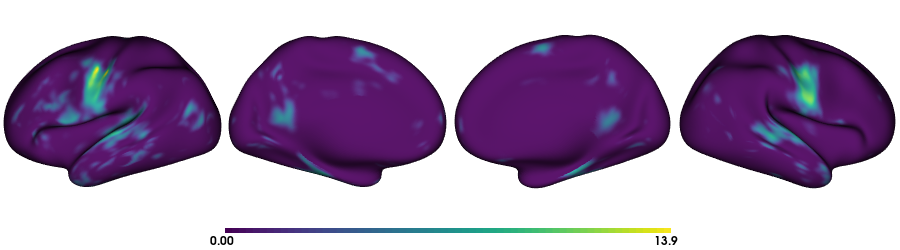

In [9]:
# Construire les chemins des fichiers en utilisant os.path.join
lh_file = os.path.join(STUDY_PATH,'masks','output','mni.L.smooth_5.32k.shape.gii')
rh_file = os.path.join(STUDY_PATH,'masks','output','mni.R.smooth_5.32k.shape.gii')
# Charger les volumes
lh_volume = [x.data for x in nib.load(lh_file).darrays]
rh_volume = [x.data for x in nib.load(rh_file).darrays]

volume = np.concatenate([lh_volume[0],rh_volume[0]], axis=0)
plot_hemispheres(vinflated_left_fslr32k,vinflated_right_fslr32k, array_name=volume.T, size=(900, 250), zoom=1.25,color_bar='bottom',share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False)

/home/romain/SVN/python/romain/.conda/lib/python3.12/site-packages/brainspace/vtk_interface/wrappers/data_object.py:166: UserWarning: Input array is boolean. Casting to uint8.
  warnings.warn('Input array is boolean. Casting to uint8.')


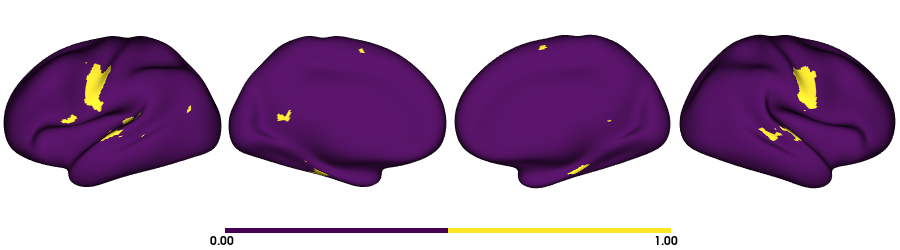

In [193]:
plot_hemispheres(vinflated_left_fslr32k,vinflated_right_fslr32k, volume.T>5.5, size=(900, 250), zoom=1.25,color_bar='bottom',share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False)

Values for Frontal_Eye_Fields_L (  1 9 )  : 563,1678.0, 2.981113576126776
Values for PeriSylvian_Language_Area_L (  2 24 )  : 74,212.0, 2.8628232801282727
Values for Area_dorsal_23_a+b_L (  3 33 )  : 74,195.0, 2.629721770415435
Values for Dorsal_area_6_L (  4 53 )  : 339,877.0, 2.5876414431231565
Values for Area_IFJa_L (  5 78 )  : 236,623.0, 2.6406534485897777
Values for Area_OP1-SII_L (  6 100 )  : 186,469.0, 2.5190513364730345
Values for Auditory_5_Complex_L (  7 124 )  : 142,632.0, 4.448635047590229
Values for ParaHippocampal_Area_1_L (  8 125 )  : 137,456.0, 3.3311809901773493
Values for ParaHippocampal_Area_3_L (  9 126 )  : 112,356.0, 3.1799398149762834
Values for Dorsal_Transitional_Visual_Area_L (  10 141 )  : 87,235.0, 2.698921115919091
Values for Auditory_4_Complex_L (  11 174 )  : 107,594.0, 5.550772693669685
Values for Area_STSv_anterior_L (  12 175 )  : 171,603.0, 3.527192411366959
Values for Dorsal_area_6_R (  13 233 )  : 356,986.0, 2.769907061973315
Values for Auditory_

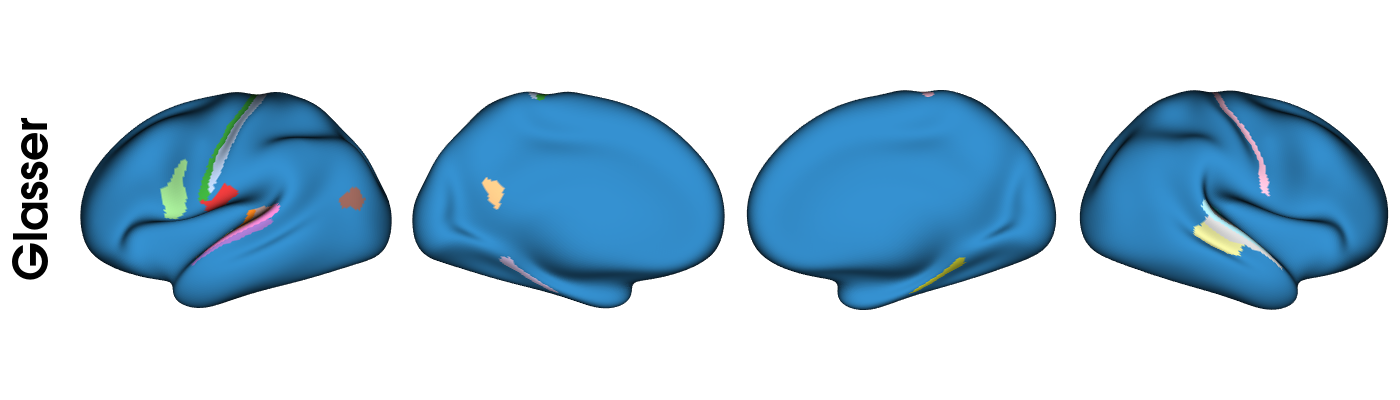

In [10]:
unique_values = np.unique(glasser_fslr32k)
roi_list = []
for value in unique_values:
    # Obtenir les indices où glasser_fslr32k est égal à la valeur courante
    indices = np.where(glasser_fslr32k == value)
    sum_mask = np.sum(volume[indices])
    if  sum_mask/len(indices[0]) >2.5:
        roi_list.append(value)
        print(f"Values for {df_exthcp.iloc[value].regionLongName} ({lbr.ansi_colors20[len(roi_list)]} {lbr.BOLD} {len(roi_list)} {value} {lbr.RESET})  : {len(indices[0])},{np.round(sum_mask,0)}, {sum_mask/len(indices[0])}")

##mask = np.isin(glasser_fslr32k, roi_list)
##mask=np.where(np.isin(glasser_fslr32k, roi_list),glasser_fslr32k, 0)

# Create a new array with the same shape as glasser_fslr32k
new_glasser_fslr32k = np.zeros_like(glasser_fslr32k)

for cpt in range(1,20):
    new_glasser_fslr32k[31186+cpt]=cpt
    
# Replace values in glasser_fslr32k with their indices in roi_list
for idx, roi in enumerate(roi_list):
    #print(idx+1, roi)
    new_glasser_fslr32k[glasser_fslr32k == roi] = idx + 1  # Indices start from 1

plot_hemispheres(vinflated_left_fslr32k,vinflated_right_fslr32k,new_glasser_fslr32k,
        label_text=["Glasser"], cmap='tab20', 
        embed_nb=True, size=(1400, 400), zoom=1.2, nan_color=(0.7, 0.7, 0.7, 1), 
        cb__labelTextProperty={"fontSize": 12},transparent_bg=False, interactive=False)

Values for Somatosensory_and_Motor_L (  1 6 )  : 2662,4712.0, 1.770231939096544
Values for Posterior_Opercular_L (  2 9 )  : 644,944.0, 1.465321037339868
Values for Early_Auditory_L (  3 10 )  : 830,2195.0, 2.6450112951807228
Values for Auditory_Association_L (  4 11 )  : 1109,1934.0, 1.7434673120139201
Values for Medial_Temporal_L (  5 13 )  : 1235,1577.0, 1.2771550599380062
Values for Somatosensory_and_Motor_R (  6 28 )  : 2670,4205.0, 1.574801395716292
Values for Posterior_Opercular_R (  7 31 )  : 592,625.0, 1.0549925726813238
Values for Early_Auditory_R (  8 32 )  : 830,856.0, 1.0312358074877634
Values for Auditory_Association_R (  9 33 )  : 1163,2155.0, 1.853304232386608


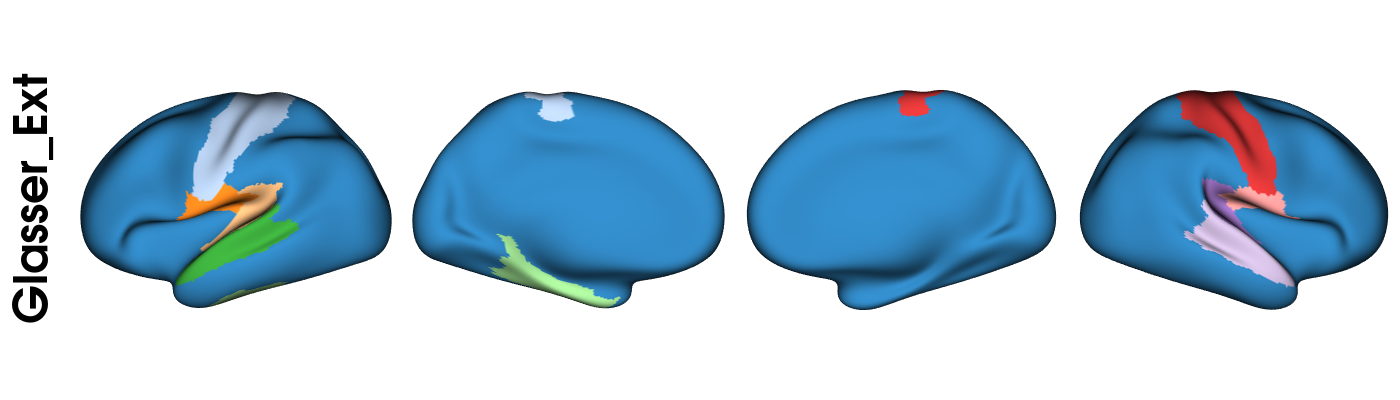

In [183]:
unique_values = np.unique(glasser_fslr32k_exthcp)
roi_list = []
for value in unique_values:
    # Obtenir les indices où glasser_fslr32k est égal à la valeur courante
    indices = np.where(glasser_fslr32k_exthcp == value)
    sum_mask = np.sum(volume[indices])
    if  sum_mask/len(indices[0]) >1:
        roi_list.append(value)
        if value < 23:
            print(f"Values for {hcpext_dict.get(value)}_L ({lbr.ansi_colors20[len(roi_list)]} {lbr.BOLD} {len(roi_list)} {value} {lbr.RESET})  : {len(indices[0])},{np.round(sum_mask,0)}, {sum_mask/len(indices[0])}")
        else:
            print(f"Values for {hcpext_dict.get(value-22)}_R ({lbr.ansi_colors20[len(roi_list)]} {lbr.BOLD} {len(roi_list)} {value} {lbr.RESET})  : {len(indices[0])},{np.round(sum_mask,0)}, {sum_mask/len(indices[0])}")

#mask = np.isin(glasser_fslr32k_exthcp, roi_list)
#mask=np.where(np.isin(glasser_fslr32k_exthcp, roi_list),glasser_fslr32k_exthcp, 0)

# Create a new array with the same shape as glasser_fslr32k
new_glasser_fslr32k = np.zeros_like(glasser_fslr32k_exthcp)

# Replace values in glasser_fslr32k with their indices in roi_list
for idx, roi in enumerate(roi_list):
    #print(idx+1, roi)
    new_glasser_fslr32k[glasser_fslr32k_exthcp == roi] = idx + 1  # Indices start from 1

for cpt in range(1,20):
    new_glasser_fslr32k[31186+cpt]=cpt
    
plot_hemispheres(vinflated_left_fslr32k,vinflated_right_fslr32k,new_glasser_fslr32k,
        label_text=["Glasser_Ext"], cmap='tab20', 
        embed_nb=True, size=(1400, 400), zoom=1.2, nan_color=(0.7, 0.7, 0.7, 1), 
        cb__labelTextProperty={"fontSize": 12},transparent_bg=False, interactive=False)

on s'en fous

Path to MNI152 template: '/home/romain/SVN/python/romain/.conda/lib/python3.12/site-packages/nilearn/datasets/data/mni_icbm152_t1_tal_nlin_sym_09a_converted.nii.gz'


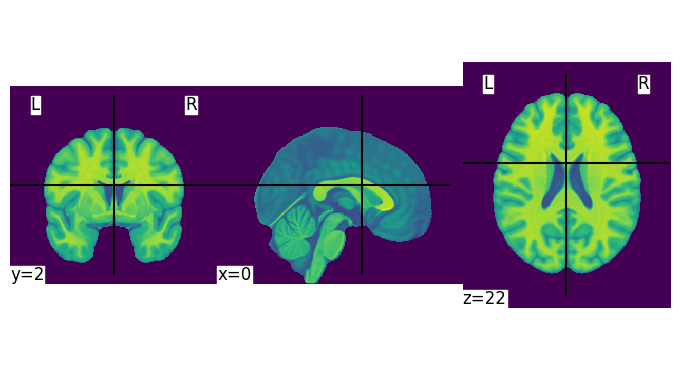

In [ ]:
# Let us use a Nifti file that is shipped with nilearn
from nilearn.datasets import MNI152_FILE_PATH
from nilearn import plotting,image

# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print(f"Path to MNI152 template: {MNI152_FILE_PATH!r}")
plotting.plot_img(MNI152_FILE_PATH)
smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=30)

# While we are giving a file name as input, the function returns
# an in-memory object:
#smooth_anat_img

In [ ]:
image_paths = [
'/NAS/dumbo/protocoles/PSY_bvFTD/masks/semantic_memory_association-test_z_FDR_0.01.nii.gz',
'/NAS/dumbo/protocoles/PSY_bvFTD/masks/speech_production_association-test_z_FDR_0.01.nii.gz',
'/NAS/dumbo/protocoles/PSY_bvFTD/masks/verbal_fluency_association-test_z_FDR_0.01.nii.gz'
]

images = [nib.load(img_path) for img_path in image_paths]

smoothed_images = []
for fwhm in range(1, 6,2):
    smoothed_images.append([gaussian_filter(img.get_fdata(), sigma=fwhm) for img in images])

sum_array = np.sum([smoothed_images[2][0], smoothed_images[2][1], smoothed_images[2][2]], axis=0)

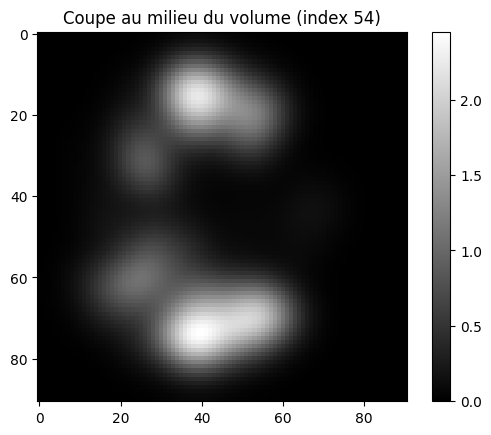

In [ ]:
# Supposons que volume soit votre volume 3D (ndarray)
#volume = np.sum([images[0].get_fdata(),images[1].get_fdata(),images[2].get_fdata()], axis=0) #
volume=sum_array
# Sélectionner une coupe du volume 3D (par exemple, la coupe au milieu)
slice_index = volume.shape[1] // 2
slice_2d = volume[:, slice_index,: ]

# Afficher la coupe 2D
plt.imshow(slice_2d, cmap='gray')
plt.title(f'Coupe au milieu du volume (index {slice_index})')
plt.colorbar()
plt.show()

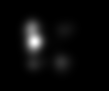

In [ ]:
# Create a list to store the image slices
images = []

# Iterate through the 3rd dimension (z-axis)
for i in range(sum_array.shape[2]):
  # Get the 2D slice
  slice_data = sum_array[:, :, i]

  # Normalize the pixel values to 0-255 for better visualization (optional)
  slice_data = (slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data)) * 255
  slice_data = slice_data.astype(np.uint8)

  # Append the slice to the list of images
  images.append(slice_data)

# Save the images as a GIF with loop enabled
imageio.mimsave('test.gif',  images + images[::-1], fps=6, loop=0)

# Display the GIF (optional)
Image(filename='test.gif')

In [ ]:
# Fusionner les images (par exemple, en prenant la somme)
merged_images = [sum(smoothed_images[i]) for i in range(len(range(5, 16, 5)))]

# Appliquer les opérations de fermeture et d'ouverture
structure = generate_binary_structure(3, 1)  # Structure pour les opérations morphologiques
closed_images = [binary_closing(img.get_fdata(), structure=structure).astype(np.int) for img in merged_images]
opened_images = [binary_opening(img, structure=structure).astype(np.int) for img in closed_images]

In [ ]:
import nibabel as nib
from nilearn import surface
import nilearn,os
import numpy as np
from brainspace.plotting import plot_hemispheres
from brainstat.datasets import fetch_mask, fetch_template_surface,fetch_parcellation

STUDY_PATH=os.path.join("/NAS","dumbo","protocoles","PSY_bvFTD")

inflated_left, inflated_right = fetch_template_surface("fsaverage5",layer="inflated",join=False)
inflated_left_fslr32k,inflated_right_fslr32k = fetch_template_surface("fslr32k",layer="inflated", join=False)

fsaverage_nii = nilearn.datasets.fetch_surf_fsaverage()

image_paths = [
'/NAS/dumbo/protocoles/PSY_bvFTD/masks/semantic_memory_association-test_z_FDR_0.01.nii.gz',
'/NAS/dumbo/protocoles/PSY_bvFTD/masks/speech_production_association-test_z_FDR_0.01.nii.gz',
'/NAS/dumbo/protocoles/PSY_bvFTD/masks/verbal_fluency_association-test_z_FDR_0.01.nii.gz'
]

for cpt_str in image_paths :
    img = nib.load(cpt_str)
    texture_right = surface.vol_to_surf(img,fsaverage_nii.pial_right)
    texture_left  = surface.vol_to_surf(img,fsaverage_nii.pial_left)
    volOnSurface_W00 = np.concatenate([texture_left,texture_right], axis=0)
    name=cpt_str.split('/')[-1].split('_')[0].replace(" ","_")
    figure_title=os.path.join(STUDY_PATH,"screenshots",f"{name}.png")
    print(name,figure_title)
    plot_hemispheres(inflated_left,inflated_right,volOnSurface_W00, color_bar=True,embed_nb=True)
    #display(Image(filename=figure_title))

semantic /NAS/dumbo/protocoles/PSY_bvFTD/screenshots/semantic.png
speech /NAS/dumbo/protocoles/PSY_bvFTD/screenshots/speech.png
verbal /NAS/dumbo/protocoles/PSY_bvFTD/screenshots/verbal.png


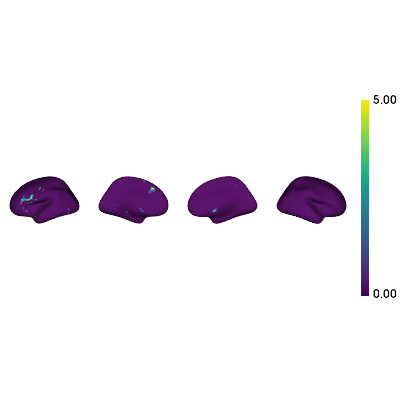

In [ ]:
plot_hemispheres(inflated_left,inflated_right,volOnSurface_W00, color_bar=True,embed_nb=True)

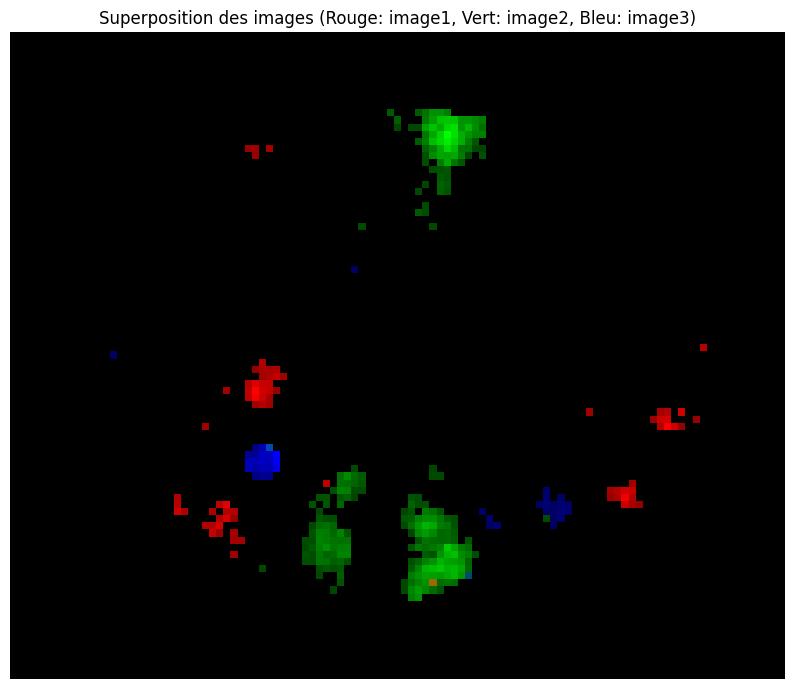

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que images soit une liste contenant vos trois images 3D
# Exemple de chargement des images
image1 = images[0].get_fdata()
image2 = images[1].get_fdata()
image3 = images[2].get_fdata()

# Sélectionner une coupe au centre pour chaque image
slice_index = image1.shape[2] // 2
slice1 = image1[:, :, slice_index]
slice2 = image2[:, :, slice_index]
slice3 = image3[:, :, slice_index]

# Normaliser les images pour qu'elles aient des valeurs entre 0 et 1
slice1_norm = (slice1 - np.min(slice1)) / (np.max(slice1) - np.min(slice1))
slice2_norm = (slice2 - np.min(slice2)) / (np.max(slice2) - np.min(slice2))
slice3_norm = (slice3 - np.min(slice3)) / (np.max(slice3) - np.min(slice3))

# Créer une image composite en superposant les trois images
composite_image = np.zeros((slice1.shape[0], slice1.shape[1], 3))
composite_image[..., 0] = slice1_norm  # Rouge
composite_image[..., 1] = slice2_norm  # Vert
composite_image[..., 2] = slice3_norm  # Bleu

# Afficher l'image composite
plt.figure(figsize=(10, 10))
plt.imshow(composite_image)
plt.title('Superposition des images (Rouge: image1, Vert: image2, Bleu: image3)')
plt.axis('off')
plt.show()

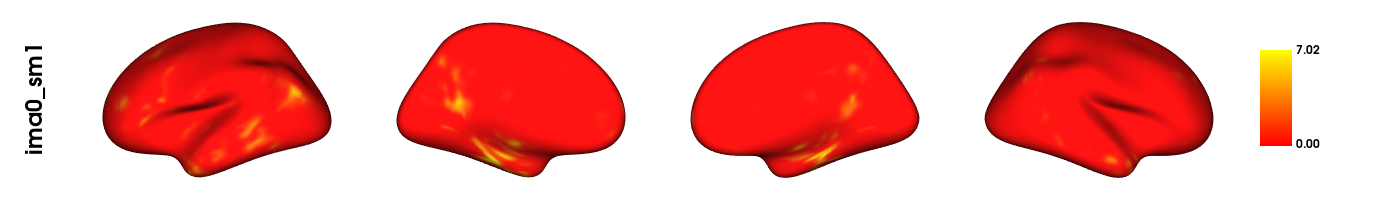

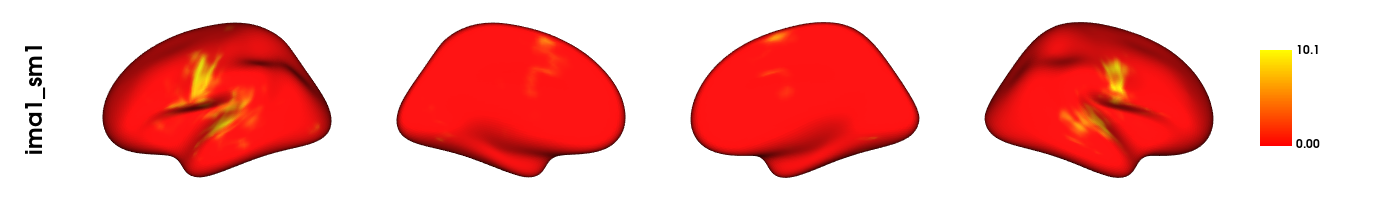

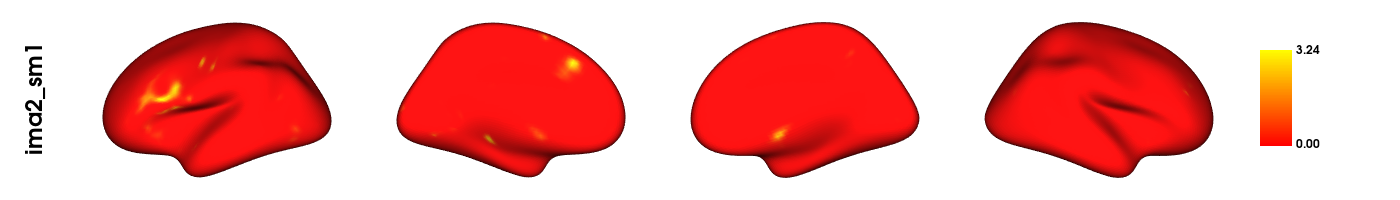

In [ ]:
# Charger le fichier NIfTI existant
existing_nifti = nib.load(image_paths[0])

# Obtenir le header et l'affine du fichier existant
header = existing_nifti.header
affine = existing_nifti.affine

for cpt,ima in enumerate(smoothed_images[0]):
    # Créer une nouvelle image NIfTI avec sum_array et le header du fichier existant
    new_nifti = nib.Nifti1Image(ima, affine, header)

    # Chemin pour enregistrer le nouveau fichier NIfTI
    new_nifti_path = f"ima{cpt}_sm1.nii.gz"

    # Enregistrer la nouvelle image NIfTI
    nib.save(new_nifti, new_nifti_path)
    img = nib.load(new_nifti_path)
    texture_right = surface.vol_to_surf(img,fsaverage_nii.pial_right)
    texture_left  = surface.vol_to_surf(img,fsaverage_nii.pial_left)
    volOnSurface_W00 = np.concatenate([texture_left,texture_right], axis=0)
    name=new_nifti_path.replace(".nii.gz","")
    figure_title=os.path.join(STUDY_PATH,"screenshots",f"{name}.png")
    plot_hemispheres(inflated_left,inflated_right,volOnSurface_W00, color_bar=True,
        label_text=[f"{name}"], cmap="autumn", embed_nb=True, size=(1400, 200), 
        zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12},
        interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
    display(Image(filename=figure_title))

In [ ]:
# Chemin du fichier NIfTI existant
existing_nifti_path = '/NAS/dumbo/protocoles/PSY_bvFTD/verbal fluency_association-test_z_FDR_0.01.nii.gz'

# Charger le fichier NIfTI existant
existing_nifti = nib.load(existing_nifti_path)

# Obtenir le header et l'affine du fichier existant
header = existing_nifti.header
affine = existing_nifti.affine

# Exemple de sum_array (remplacez par votre tableau réel)
# sum_array = np.random.rand(*existing_nifti.shape)  # Assurez-vous que sum_array a la même forme que l'image existante

# Créer une nouvelle image NIfTI avec sum_array et le header du fichier existant
new_nifti = nib.Nifti1Image(sum_array, affine, header)

# Chemin pour enregistrer le nouveau fichier NIfTI
new_nifti_path = 'sum_array_nifti.nii.gz'

# Enregistrer la nouvelle image NIfTI
nib.save(new_nifti, new_nifti_path)

print(f"Le nouveau fichier NIfTI a été enregistré sous {new_nifti_path}")

Le nouveau fichier NIfTI a été enregistré sous sum_array_nifti.nii.gz


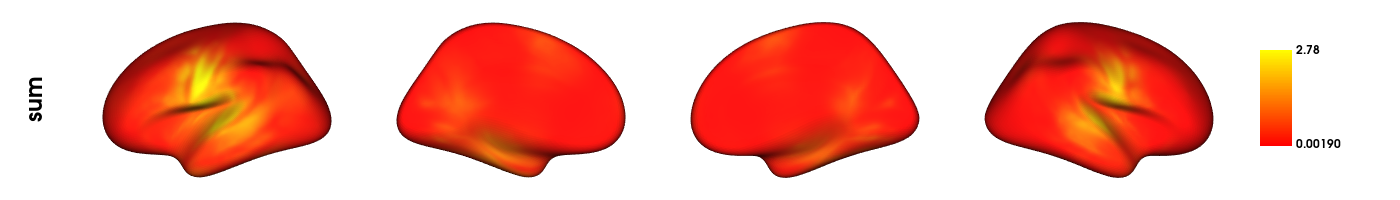

In [ ]:
img = nib.load(new_nifti_path)
texture_right = surface.vol_to_surf(img,fsaverage_nii.pial_right)
texture_left  = surface.vol_to_surf(img,fsaverage_nii.pial_left)
volOnSurface_W00 = np.concatenate([texture_left,texture_right], axis=0)
figure_title=os.path.join(STUDY_PATH,"screenshots",f"sum.png")
plot_hemispheres(inflated_left,inflated_right,volOnSurface_W00, color_bar=True,
    label_text=[f"sum"], cmap="autumn", embed_nb=True, size=(1400, 200), 
    zoom=1.45, nan_color=(0.7, 0.7, 0.7, 1), cb__labelTextProperty={"fontSize": 12},
    interactive=True,transparent_bg=False,screenshot=True, offscreen=False,filename=figure_title)
display(Image(filename=figure_title))